In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as m 

import countries as c

import importlib
import qcut_func as q

importlib is imported in order to support changes to bespoke modules 

In [33]:
q = importlib.reload(q)

In [34]:
for i in range(1,13):
    if i == 1:
        df = pd.read_csv('raw_data/all_energy_statistics' + str(i) +'.csv')
        df_cols = df.columns.to_list()
    else:
        df1 = pd.read_csv('raw_data/all_energy_statistics' + str(i) + '.csv',header=None)
        df1.columns = df_cols
        df = df.append(df1) 

In [35]:
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1189482 entries, 0 to 89482
Data columns (total 7 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   country_or_area        1189482 non-null  object 
 1   commodity_transaction  1189482 non-null  object 
 2   year                   1189482 non-null  int64  
 3   unit                   1189482 non-null  object 
 4   quantity               1189482 non-null  float64
 5   quantity_footnotes     163946 non-null   float64
 6   category               1189482 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 72.6+ MB


In [37]:
footnotes_nan = df[df['quantity_footnotes'].isna() != True]
footnotes_nan

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
622,Colombia,Additives and Oxygenates - Production,2014,"Metric tons, thousand",34.53,1.0,additives_and_oxygenates
1369,Colombia,Additives and Oxygenates - Total energy supply,2014,"Metric tons, thousand",34.53,1.0,additives_and_oxygenates
1886,Colombia,Additives and Oxygenates - transfers and recyc...,2014,"Metric tons, thousand",34.53,1.0,additives_and_oxygenates
2250,Jordan,Additives and Oxygenates - Transformation,2014,"Metric tons, thousand",103.00,1.0,additives_and_oxygenates
2251,Jordan,Additives and Oxygenates - Transformation,2013,"Metric tons, thousand",101.00,1.0,additives_and_oxygenates
...,...,...,...,...,...,...,...
89470,Vanuatu,Electricity - total wind production,2013,"Kilowatt-hours, million",3.00,1.0,wind_electricity
89472,Vanuatu,Electricity - total wind production,2011,"Kilowatt-hours, million",5.00,1.0,wind_electricity
89476,Viet Nam,Electricity - total wind production,2014,"Kilowatt-hours, million",300.00,1.0,wind_electricity
89477,Viet Nam,Electricity - total wind production,2013,"Kilowatt-hours, million",92.00,1.0,wind_electricity


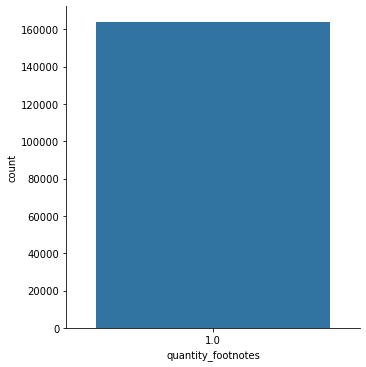

In [38]:
sns.catplot(x='quantity_footnotes',
            data=df,
            kind='count')
plt.show()

I wanted to check whether any commodities were expressed in multiple units. Below is an attempt to display this

In [39]:
categories_and_units = df.drop_duplicates(['unit', 'commodity_transaction'])

categories_and_units.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2468 entries, 0 to 88116
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country_or_area        2468 non-null   object 
 1   commodity_transaction  2468 non-null   object 
 2   year                   2468 non-null   int64  
 3   unit                   2468 non-null   object 
 4   quantity               2468 non-null   float64
 5   quantity_footnotes     252 non-null    float64
 6   category               2468 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 154.2+ KB


In [40]:
categories_and_units['commodity_transaction'].nunique()

2452

There are 2452 commods with 2468 rows suggesting some commods have multilpe units.

Below we count the instance of a commodity_transaction and only output those that are repeated. This shows 16 repeats meaning we should be careful using plots with these commodities

In [41]:
multi_units = categories_and_units['commodity_transaction'].value_counts(sort= True)
multi_units[multi_units == 2]

From other sources – Main activity – CHP plants        2
From other sources – Autoproducer                      2
Geothermal – Autoproducer – CHP plants                 2
Geothermal – Main activity                             2
From other sources – Autoproducer – CHP plants         2
From combustible fuels – Main activity                 2
Solar thermal – Main activity                          2
Geothermal – Autoproducer                              2
Solar thermal – Autoproducer                           2
From combustible fuels – Autoproducer – CHP plants     2
From other sources – Main activity                     2
Nuclear – Main activity                                2
From combustible fuels – Main activity – CHP plants    2
From combustible fuels – Autoproducer                  2
Geothermal – Main activity – CHP plants                2
Nuclear – Main activity – CHP plants                   2
Name: commodity_transaction, dtype: int64

In [42]:
multi_units_list = list(multi_units.index[multi_units == 2])
multi_units_list

['From other sources – Main activity – CHP plants',
 'From other sources – Autoproducer',
 'Geothermal – Autoproducer – CHP plants',
 'Geothermal – Main activity',
 'From other sources – Autoproducer – CHP plants',
 'From combustible fuels – Main activity',
 'Solar thermal – Main activity',
 'Geothermal – Autoproducer',
 'Solar thermal – Autoproducer',
 'From combustible fuels – Autoproducer – CHP plants',
 'From other sources – Main activity',
 'Nuclear – Main activity',
 'From combustible fuels – Main activity – CHP plants',
 'From combustible fuels – Autoproducer',
 'Geothermal – Main activity – CHP plants',
 'Nuclear – Main activity – CHP plants']

The below requires further investigation but serves as a basis check when attempting to return any insights. 

We should be careful of plots involving the below country/commodity

In [43]:
categories_and_units[categories_and_units['commodity_transaction'].isin(multi_units_list)][['country_or_area', 
                                                                                            'commodity_transaction', 
                                                                                            'year', 
                                                                                            'unit', 
                                                                                            'quantity', 
                                                                                            'category']]

,country_or_area,commodity_transaction,year,unit,quantity,category
34029,Austria,From combustible fuels – Autoproducer,2014,Terajoules,10022.000000,heat
34665,Austria,From combustible fuels – Autoproducer – CHP pl...,2014,Terajoules,9423.000000,heat
35715,Albania,From combustible fuels – Main activity,2014,Terajoules,213.520000,heat
36847,Armenia,From combustible fuels – Main activity – CHP p...,2014,Terajoules,127.000000,heat
39023,Denmark,From other sources – Autoproducer,2014,Terajoules,2488.000000,heat
39149,Finland,From other sources – Autoproducer – CHP plants,2012,Terajoules,5.000000,heat
39282,Czechia,From other sources – Main activity,2014,Terajoules,340.000000,heat
39360,Czechia,From other sources – Main activity – CHP plants,2014,Terajoules,340.000000,heat
39454,Austria,Geothermal – Autoproducer,2014,Terajoules,58.000000,heat
39508,Romania,Geothermal – Autoproducer – CHP plants,2008,Terajoules,0.000000,heat


Below is an analysis of the energy usage of different countries

 

First goals are to get an overview of total energy, followed by specific fuel types

In [44]:
fuel_total_by_country = df.groupby(['country_or_area', 'category'])['quantity'].sum()
fuel_total_by_country

country_or_area  category                                                   
Afghanistan      aviation_gasoline                                              2.400000e+01
                 charcoal                                                       1.259391e+04
                 electricity_net_installed_capacity_of_electric_power_plants    4.822800e+04
                 falling_water                                                  3.940000e+05
                 fuel_oil                                                       1.520000e+02
                                                                                    ...     
Zimbabwe         other_vegetal_material_and_residues                            1.387903e+07
                 paraffin_waxes                                                 4.800000e+01
                 thermal_electricity                                            1.085878e+05
                 total_electricity                                              1.9616

In [45]:
fuel_total_per_country = df[df['category'] == 'wind_electricity'].pivot_table(index = 'country_or_area', values = 'quantity', fill_value = True).sort_values('quantity', ascending = False)
fuel_total_per_country

,quantity
country_or_area,
China,101641.200000
United States,40094.680000
Germany,21780.125000
Spain,17676.880000
India,8356.000000
...,...
Azerbaijan,1.000000
St. Helena and Depend.,0.908571
St. Pierre-Miquelon,0.856667


In [46]:
df['category'].unique()
df

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
89478,Viet Nam,Electricity - total wind production,2012,"Kilowatt-hours, million",92.0,1.0,wind_electricity
89479,Viet Nam,Electricity - total wind production,2011,"Kilowatt-hours, million",87.0,NaN,wind_electricity
89480,Viet Nam,Electricity - total wind production,2010,"Kilowatt-hours, million",50.0,NaN,wind_electricity
89481,Viet Nam,Electricity - total wind production,2009,"Kilowatt-hours, million",10.0,NaN,wind_electricity


As a quick solution I have copied a dictionary of countries which can be divided by continent.

The goal of this is to plot line graphs of different countries within a continent for comparison

In [47]:
countries_df = pd.DataFrame(c.countries_dict)
countries_df[countries_df['continent'] == 'Europe']['name']
df_europe = df[df['country_or_area'].isin(countries_df[countries_df['continent'] == 'Europe']['name'])]

df_europe

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,NaN,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,NaN,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,NaN,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,NaN,additives_and_oxygenates
...,...,...,...,...,...,...,...
89432,United Kingdom,Electricity - total wind production,1994,"Kilowatt-hours, million",342.0,NaN,wind_electricity
89433,United Kingdom,Electricity - total wind production,1993,"Kilowatt-hours, million",218.0,NaN,wind_electricity
89434,United Kingdom,Electricity - total wind production,1992,"Kilowatt-hours, million",40.0,NaN,wind_electricity
89435,United Kingdom,Electricity - total wind production,1991,"Kilowatt-hours, million",11.0,NaN,wind_electricity


Below, .copy() is used to prevent chaining over multiple lines. Basically, we confirm that df_europe_elec_total_wind is a copy of df_europe, which mitigates the risk of accidentally changin df_europe. See the linked blog post for more detail https://www.dataquest.io/blog/settingwithcopywarning/

<function matplotlib.pyplot.show(close=None, block=None)>

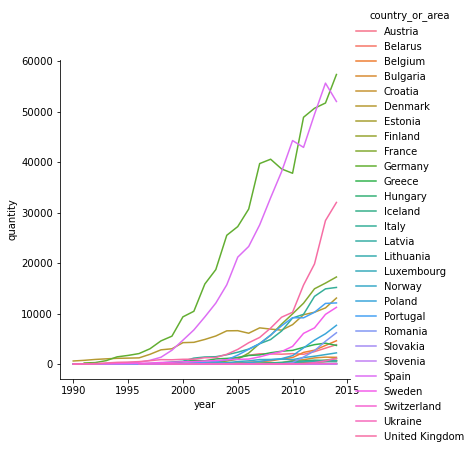

In [72]:
# df_europe_elec_total_wind = df_europe[df_europe['commodity_transaction'] == 'Electricity - total wind production'].sort_values('quantity', ascending=False)
df_europe_elec_total_wind = df_europe[df_europe['commodity_transaction'] == 'Electricity - total wind production'].copy()

sns.relplot(x='year', y='quantity',
           data=df_europe_elec_total_wind,
           kind='line',
           hue='country_or_area')

plt.show

In [73]:
df_europe[(df_europe['category'] == 'wind_electricity') & (df_europe['country_or_area'] == 'Germany')]

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
88562,Germany,Electricity - total wind production,2014,"Kilowatt-hours, million",57357.0,NaN,wind_electricity
88563,Germany,Electricity - total wind production,2013,"Kilowatt-hours, million",51708.0,NaN,wind_electricity
88564,Germany,Electricity - total wind production,2012,"Kilowatt-hours, million",50670.0,NaN,wind_electricity
88565,Germany,Electricity - total wind production,2011,"Kilowatt-hours, million",48883.0,NaN,wind_electricity
88566,Germany,Electricity - total wind production,2010,"Kilowatt-hours, million",37793.0,NaN,wind_electricity
88567,Germany,Electricity - total wind production,2009,"Kilowatt-hours, million",38647.0,NaN,wind_electricity
88568,Germany,Electricity - total wind production,2008,"Kilowatt-hours, million",40574.0,NaN,wind_electricity
88569,Germany,Electricity - total wind production,2007,"Kilowatt-hours, million",39713.0,NaN,wind_electricity
88570,Germany,Electricity - total wind production,2006,"Kilowatt-hours, million",30710.0,NaN,wind_electricity
88571,Germany,Electricity - total wind production,2005,"Kilowatt-hours, million",27229.0,NaN,wind_electricity


In [74]:
df_europe_elec_total_wind.head()

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category
88168,Austria,Electricity - total wind production,2014,"Kilowatt-hours, million",3846.0,NaN,wind_electricity
88169,Austria,Electricity - total wind production,2013,"Kilowatt-hours, million",3152.0,NaN,wind_electricity
88170,Austria,Electricity - total wind production,2012,"Kilowatt-hours, million",2462.0,NaN,wind_electricity
88171,Austria,Electricity - total wind production,2011,"Kilowatt-hours, million",1936.0,NaN,wind_electricity
88172,Austria,Electricity - total wind production,2010,"Kilowatt-hours, million",2064.0,NaN,wind_electricity


As a group we have set a challenge to reproduce the qcut function in a seperate module due to an existing bug. Below is an investigation into the function

In [77]:
df_europe_elec_total_wind.loc[:,'quartile'] = pd.qcut(q=10, x=df_europe_elec_total_wind.loc[:,'quantity'], labels=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'])

In [51]:
df_europe_elec_total_wind

,country_or_area,commodity_transaction,year,unit,quantity,quantity_footnotes,category,quartile
88168,Austria,Electricity - total wind production,2014,"Kilowatt-hours, million",3846.0,NaN,wind_electricity,Q9
88169,Austria,Electricity - total wind production,2013,"Kilowatt-hours, million",3152.0,NaN,wind_electricity,Q9
88170,Austria,Electricity - total wind production,2012,"Kilowatt-hours, million",2462.0,NaN,wind_electricity,Q8
88171,Austria,Electricity - total wind production,2011,"Kilowatt-hours, million",1936.0,NaN,wind_electricity,Q8
88172,Austria,Electricity - total wind production,2010,"Kilowatt-hours, million",2064.0,NaN,wind_electricity,Q8
...,...,...,...,...,...,...,...,...
89432,United Kingdom,Electricity - total wind production,1994,"Kilowatt-hours, million",342.0,NaN,wind_electricity,Q6
89433,United Kingdom,Electricity - total wind production,1993,"Kilowatt-hours, million",218.0,NaN,wind_electricity,Q6
89434,United Kingdom,Electricity - total wind production,1992,"Kilowatt-hours, million",40.0,NaN,wind_electricity,Q4
89435,United Kingdom,Electricity - total wind production,1991,"Kilowatt-hours, million",11.0,NaN,wind_electricity,Q3


We would want the qcut func to categorize quantity data but this should be on a df that has a single unit. 

Also it would be useful to be able to categorize on grouped data e.g. countries with the most data 

In [92]:
q = importlib.reload(q)

In [93]:
q.qcut_james(x=df_europe_elec_total_wind['quantity'], q=6)

AttributeError: 'Series' object has no attribute 'columns'

In [79]:
df_europe_elec_total_wind['james_quart'] = q.qcut_james(x=df_europe_elec_total_wind['quantity'], q=6)

In [85]:
# df_europe_elec_total_wind